## INF-578. Machine Learning. Tarea 1.
# Métodos Lineales para Regresión

## Álvaro Salinas -  Camilo Valenzuela

## 20 de Octubre de 2017

### Tabla de Contenidos

* [Librerías Necesarias](#libs)
* [Pregunta 1](#1)
    * [1.a](#1a)
    * [1.b](#1b)
    * [1.c](#1c)
    * [1.d](#1d)
    * [1.e](#1e)
    * [1.f](#1f)
    * [1.j](#1j)
    * [1.h](#1h)
* [Pregunta 2](#2)
    * [2.a](#2a)
* [Pregunta 3](#3)
    * [3.a](#3a)
    * [3.b](#3b)
    * [3.c](#3c)
    * [3.d](#3d)
    * [3.e](#3e)
* [Pregunta 4](#4)
    * [4.a](#4a)
    * [4.b](#4b)

<div id='libs' />
### Librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

%matplotlib inline

<div id='1' />
### 1. Regresión Lineal Ordinaria (LSS)

<div id='1a' />
##### (a) Construya un dataframe con los datos a analizar descargando los datos desde la URL adjunta.

In [2]:
df = pd.read_csv("kc_house_data.csv",sep=",", header=0)
df = df.drop(['id','date','zipcode'], axis=1)

<div id='1b' />
##### (b) Describa brevemente el dataset utilizar.

Los datos corresponden a 21613 ejemplos con 18 características (3 fueron eliminadas del modelo). De éstas, la primera (precio) será la variable a predecir a partir de las 17 restantes.

Las características presentan tres formatos distintos, pudiendo encontrar:
* Valores continuos. 
* Valores discretos.
* Variable booleana.

In [3]:
df.shape

(21613, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


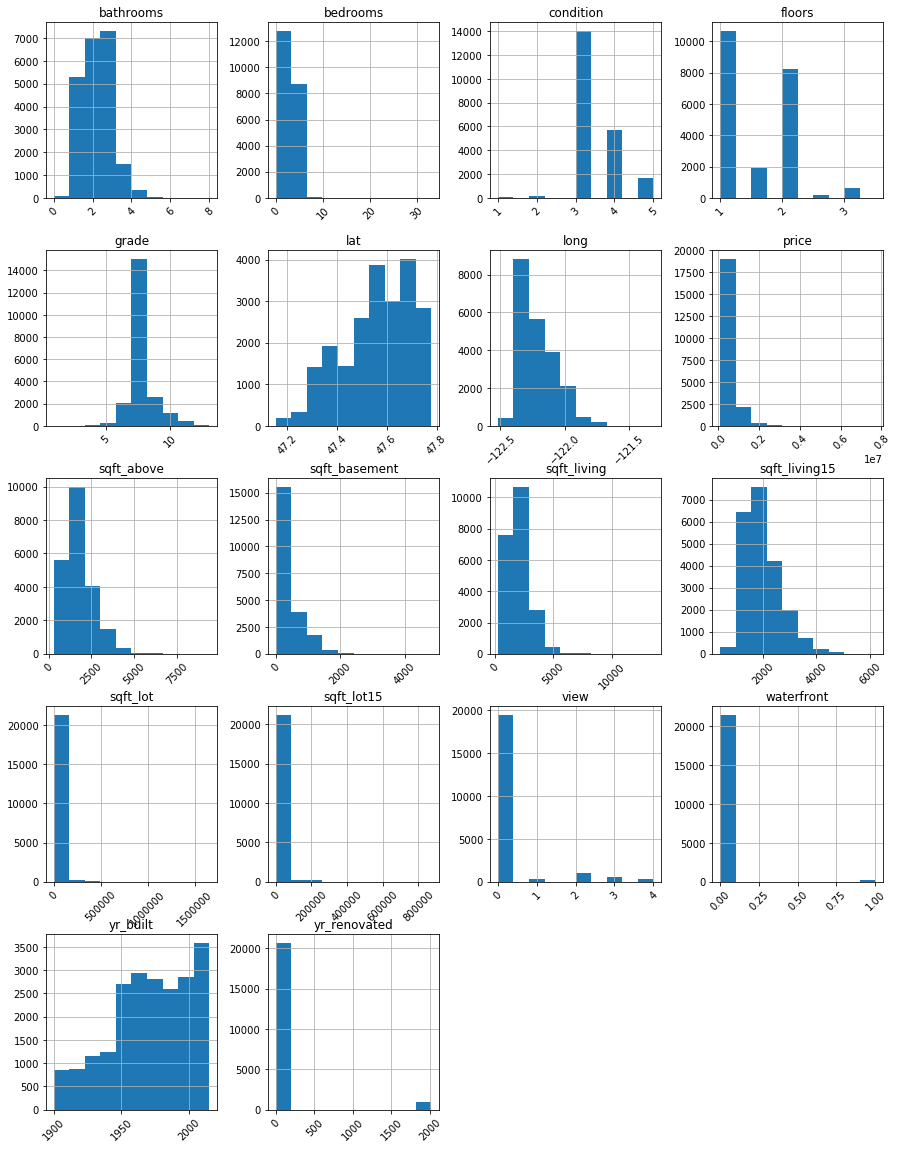

In [6]:
df.hist(figsize=(15,20),xrot=45)
plt.show()

<div id='1c' />
##### (c) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar esta operación.

Mediante la normalización se evita que la escala de las características influyan en el modelo. De esta forma, todas las características se reducen a una misma escala, logrando que valores muy grandes no afecten más que los pequeños en el resultado del clasificador/regresor.

También es importante aplicar logaritmo a la característica de precio, pues así es mucho más razonable intentar ajustarla mediante un modelo lineal, como puede verse en los gráficos a continuación.

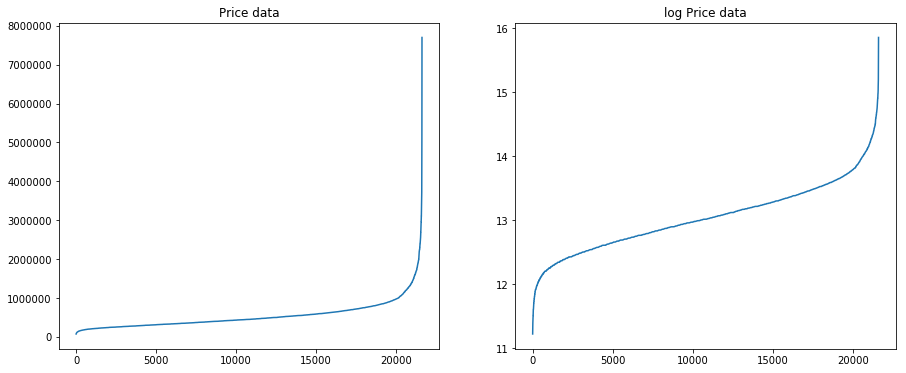

In [7]:
fig, axarr = plt.subplots(1,2, figsize=(15,6))
axarr[0].plot(np.sort(df['price']))
axarr[1].plot(np.log(np.sort(df['price'])))
axarr[0].set_title('Price data')
axarr[1].set_title('log Price data')
plt.show()

In [8]:
X = df
y = np.log(df['price'])
mask = np.zeros(len(X))
limit = int(len(X)*0.7)
mask[:limit] = 1
istrain = (mask== 1)
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xtrain = Xtrain.drop(['price'], axis=1)
Xtest = Xtest.drop(['price'], axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrain)
df_scaled_train = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
df_scaled_train.insert(df_scaled_train.shape[1], 'intercept', np.ones(df_scaled_train.shape[0]))

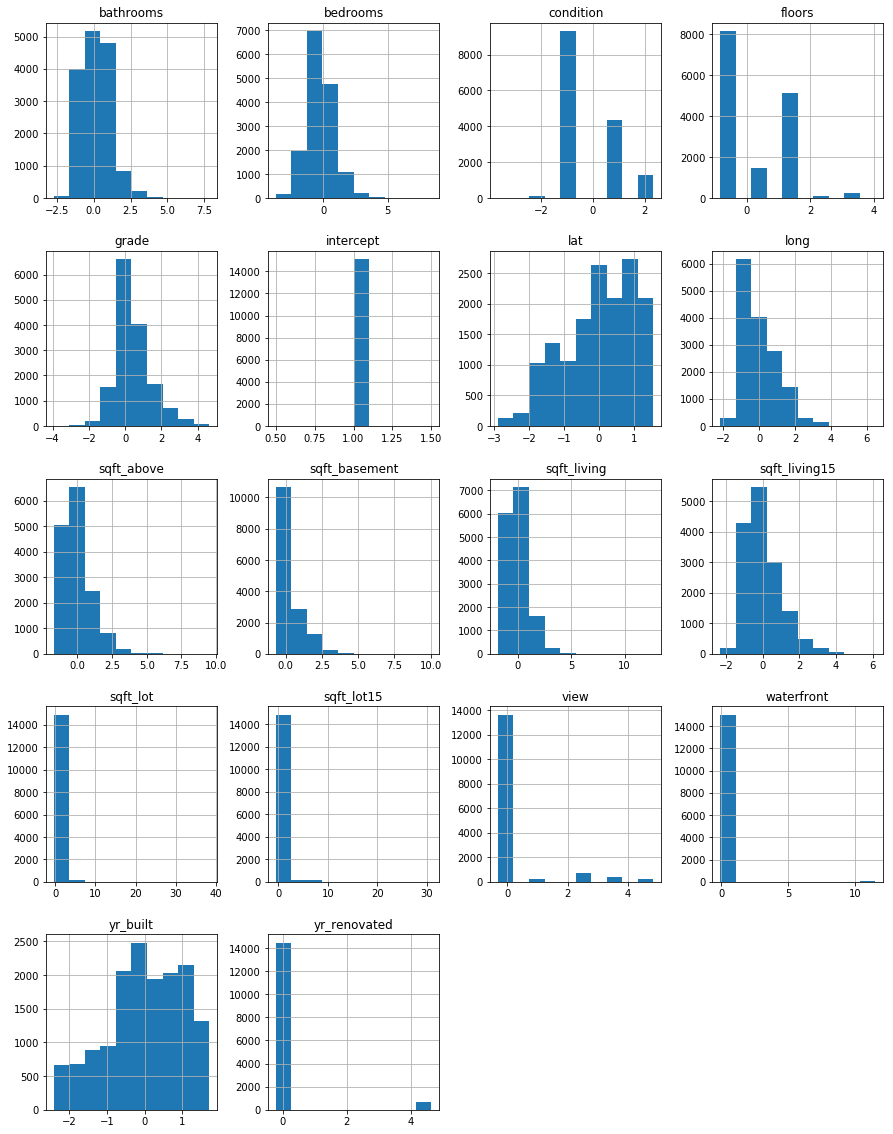

In [10]:
df_scaled_train.hist(figsize=(15,20))
plt.show()

<div id='1d' />
##### (d) Realice una regresión lineal de mínimos cuadrados básica. Explique los argumentos que se deben entregar a la función que implementa la regresión lineal.

En este caso, el único parámetro entregado al modelo lineal es fit_intercept, el cual decide si el intercepto se debe ajustar junto a los pesos o no. En esta implementación su valor es False debido a que los datos ya fueron centrados anteriormente. Adicionalmente, se agregó manualmente un atributo 'intercepto', por lo que será ajustado mediante los pesos de esa característica.

In [11]:
import sklearn.linear_model as lm
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(df_scaled_train, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

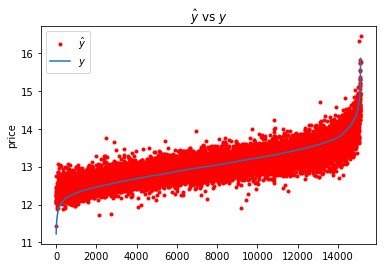

In [12]:
ytrp = linreg.predict(df_scaled_train)
ytrain_inds = ytrain.argsort()
plt.title(r'$\hat{y}$ vs $y$')
plt.ylabel('price')
plt.plot(range(ytrain.shape[0]),ytrp[ytrain_inds],'r.',label=r'$\hat{y}$')
plt.plot(range(ytrain.shape[0]),ytrain[ytrain_inds],label=r'$y$')
plt.legend(loc='best')
plt.show()

<div id='1e' />
##### (e) Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Observa algún problema? Si es así, comente y proponga un método para eliminar dicho problema.

Existen variables con un Z-score muy cercano a cero, por lo que en un modelo lineal (donde no se capturan las interacciones entre variables) no aportarán mayormente al resultado, generando un costo computacional innecesario. Para evitar este problema podemos utilizar Feature Selection y así obtener un subconjunto de características.

In [13]:
def calculate_z(lm,X,y):
    coefs =linreg.coef_[:-1]
    var = np.sum((lm.predict(X)-y)**2)/(len(X) - len(coefs) - 1)
    X = X.drop(["intercept"], axis=1)
    xtx = np.dot(X.T,X)
    diag = np.diag(np.linalg.inv(xtx))
    z = coefs/(np.sqrt(var)*np.sqrt(diag))
    df = pd.DataFrame({"names":X.columns,"coefs":coefs,"z-score":z})
    return df

In [14]:
z_scores = calculate_z(linreg,df_scaled_train,ytrain)

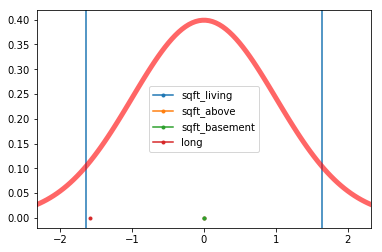

In [15]:
from scipy.stats import t
fig, ax = plt.subplots(1, 1)
dfreedom = len(df_scaled_train) - len(linreg.coef_[::-1] -1)
x = np.linspace(t.ppf(0.01, dfreedom), t.ppf(0.99, dfreedom), 100)
ax.set_xlim((t.ppf(0.01, dfreedom), t.ppf(0.99, dfreedom)))
ax.axvline(t.ppf(0.05, dfreedom))
ax.axvline(t.ppf(0.95, dfreedom))
ax.plot(x, t.pdf(x, dfreedom),'r-', lw=5, alpha=0.6)
for i,point in enumerate(z_scores["z-score"]):
    if point < 2 and point > -2:
        ax.plot([point], [0], marker='o', markersize=3, label=df_scaled_train.columns[i])
ax.legend()

In [16]:
z_scores

,coefs,names,z-score
0,-0.008086,bedrooms,-3.034180e+00
1,0.055111,bathrooms,1.465651e+01
2,0.056935,sqft_living,7.530827e-07
3,0.022873,sqft_lot,7.597741e+00
4,0.035505,floors,1.227029e+01
5,0.033366,waterfront,1.478618e+01
6,0.042595,view,1.739128e+01
7,0.046360,condition,2.053749e+01
8,0.184577,grade,4.806978e+01
9,0.045937,sqft_above,6.824477e-07


$sqft\_above, sqft\_basement, sqft\_living \approx 0$

<div id='1f' />
##### (f) Estime el error de predicción del modelo usando validación cruzada con un número de “folds” igual a K = 5 y K = 10. Recuerde que para que la estimación sea razonable debe ajustar los pesos del modelo de nuevo, cada vez que trabaja sobre un determinado “fold”. Mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

Los errores de los tres casos (evaluación directa, cv con K=5 y cv con K=10) son bastante parecidos, aunque sí se logra apreciar una leve mejora con cross-validation en vez del modelo inicial y con 10 folds en vez de 5. Esto podría significar que la muestra de datos de entrenamiento es representativa de los datos de test, por lo que entrenar el modelo directamente con ellos no sugiere mucha diferencia con separar subconjuntos de validación, pues no existe overfitting (como es posible apreciar al intentar predecir con los datos de entrenamiento, en donde el error es muy similar al de prueba).

In [17]:
x_test = pd.DataFrame(scaler.transform(Xtest),columns=Xtest.columns)
x_test.insert(x_test.shape[1], 'intercept', np.ones(x_test.shape[0]))
yhat_test = linreg.predict(x_test)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
mse_test

0.06525925123726196

In [18]:
yhat_tr = linreg.predict(df_scaled_train)
mse_test = np.mean(np.power(yhat_tr - ytrain, 2))
mse_test

0.06451632107064299

In [19]:
from sklearn.model_selection import KFold
def k_fold_cv(X,y,n_fold=5):
    X = X.as_matrix()
    y = y.as_matrix()
    kf = KFold(n_splits=n_fold)
    mse_cv = 0
    for train,val in kf.split(X):
        cross_scaler = StandardScaler().fit(X[train])
        df_cross_train = pd.DataFrame(cross_scaler.transform(X[train]))
        df_cross_train.insert(df_cross_train.shape[1],'intercept', np.ones(df_cross_train.shape[0]))
        linreg = lm.LinearRegression(fit_intercept= False )
        linreg.fit(df_cross_train,y[train])
        df_cross_test = pd.DataFrame(cross_scaler.transform(X[val]))
        df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
        yhat_val = linreg.predict(df_cross_test)
        mse_fold = np.mean(np.power(yhat_val - y[val], 2))
        mse_cv += mse_fold
    return mse_cv /n_fold 

In [20]:
print(k_fold_cv(Xtrain,ytrain,n_fold=5))
print(k_fold_cv(Xtrain,ytrain,n_fold=10))

0.064701633522
0.0646829054256


<div id='1j' />
##### (j) Mida los errores de predicción para cada dato de entrenamiento. Utilizando un “quantile-quantile plot” determine si es razonable la hipótesis de normalidad sobre los residuos del modelo

La hipótesis de normalidad sobre los residuos del modelo ($y = X^T \beta + \epsilon$, $\epsilon \sim N(0, \sigma^2)$) es razonable, pues la curva se ajusta bastante bien a la recta del gráfico Q-Q. 

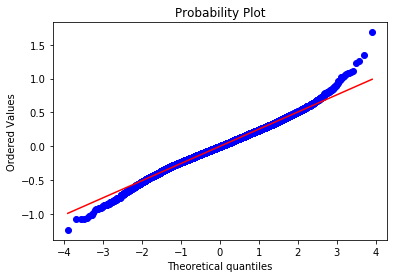

In [21]:
import scipy.stats as stats

y_hat_train = linreg.predict(df_scaled_train)
error = y_hat_train-ytrain
_ = stats.probplot(error, dist="norm", plot=plt)

<div id='1h' />
##### (h) Se generan dos muestreos de datos donde el valor de sus etiqueta siguen distribuciones distintas: Genere dos modelos, evalue y compare sus comportamientos.

Ambos muestreos presentan un comportamiento similar, siendo razonable la hipótesis de normalidad en ambos, aunque debido a la extraña forma que toma el extremo derecho de la curva en el Q-Q plot del modelo A, es posible asumir que presenta más outliers que el modelo B (ver histograma). Esto es corroborado al visualizar que el error cuadrático medio del modelo A es muy superior al del modelo B tanto en datos de entrenamiento como de prueba.

In [22]:
df_A = df.sample(3000)
frames = []
valor = np.log(df.price)
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,0.5):
    frames.append(df[(np.log(df.price) >= z) & (np.log(df.price) < z+0.5)].head(500))
df_B = pd.concat(frames).sample(3000)
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A, Xval_A, ytrain_A, yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B, Xval_B, ytrain_B, yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

In [23]:
linreg_A = lm.LinearRegression(fit_intercept=False)
linreg_B = lm.LinearRegression(fit_intercept=False)
linreg_A.fit(Xtrain_A,ytrain_A)
linreg_B.fit(Xtrain_B,ytrain_B)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [24]:
yhat_A = linreg_A.predict(Xval_A)
yhat_B = linreg_B.predict(Xval_B)

resid_A = yval_A - yhat_A
resid_B = yval_B - yhat_B

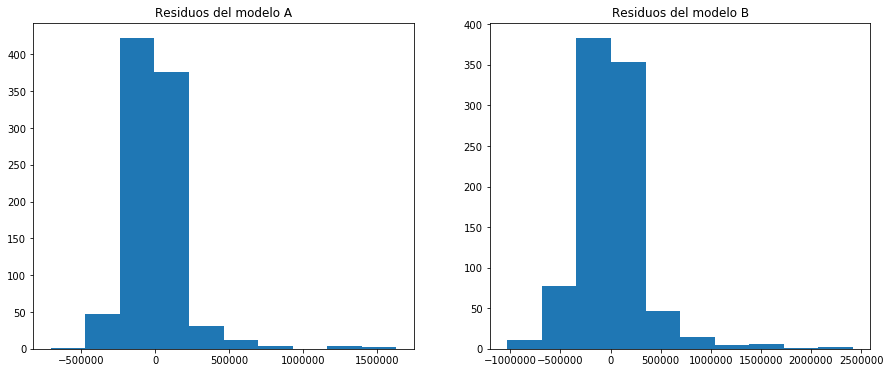

In [25]:
fig, axarr = plt.subplots(1,2, figsize=(15,6))
axarr[0].hist(resid_A)
axarr[1].hist(resid_B)
axarr[0].set_title('Residuos del modelo A')
axarr[1].set_title('Residuos del modelo B')
plt.show()

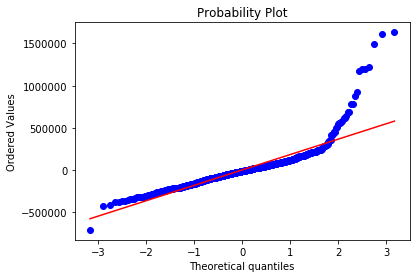

In [26]:
_ = stats.probplot(resid_A, dist="norm", plot=plt)

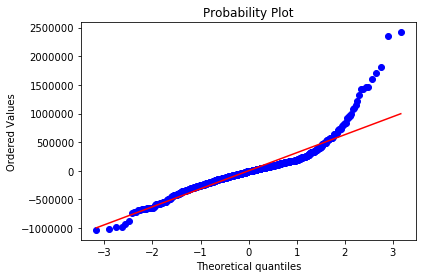

In [27]:
_ = stats.probplot(resid_B, dist="norm", plot=plt)

In [28]:
print("A:")
print("Train:")
print(metrics.mean_squared_error(linreg_A.predict(Xtrain_A),ytrain_A))
print("Test:")
print(metrics.mean_squared_error(yval_A,yhat_A))
print("B:")
print("Train:")
print(metrics.mean_squared_error(linreg_B.predict(Xtrain_B),ytrain_B))
print("Test:")
print(metrics.mean_squared_error(yval_B,yhat_B))

A:
Train:
35688636634.0
Test:
42010773561.4
B:
Train:
113088612600.0
Test:
113142368561.0


<div id='2' />
### 2. Seleccion de Atributos

<div id='2a' />
##### (a) Construya una función que implemente Forward Step-wise Selection (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo. Ordene el eje x de menor a mayor. 

* Al empezar a agregar nuevas caracteristicas el error cuadrático comienza a disminuir rápidamente hasta que llega a las 5 carácteristicas y comienza a disminuir lentamente.

* Cambiando la métrica por el $r^2$ o el Valor Absoluto Medio, no cambia el orden en que se seleccionan los parámetros.

* Para seleccionar la mejor cantidad de caracteristicas se puede poner un umbral del cambio entre el error anterior y el nuevo al agregar otra caracteristica, si este cambio no es significativo parar el algoritmo.

In [29]:
def fss(x, y, names_x, k = 10000, metric = "mse"):
    p = x.shape[1]-1

    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))

    #Cómo seleccionar el primero
    selected = [p]

    current_score = 0.0
    best_new_score = 0.0
    
    mses = []
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            if metric == "mse":
                mse_candidate = np.mean(np.power(residuals_train, 2))
            elif metric=="r2":
                mse_candidate = -metrics.r2_score(y,predictions_train)
            elif metric =="mae":
                mse_candidate = metrics.mean_absolute_error(y,predictions_train)
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print("selected = %s ..."%names_x[best_candidate])
        print("totalvars=%d, mse = %f"%(len(indexes),best_new_score))

    return selected
'''Revise si la cantidad de etiquetas concuerda con la cantidad de variables que esta utilizando,
 puede que tenga que eliminar un elemento de la lista name_regressors'''

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
 "sqft_living15","sqft_lot15","intercept"]

Xm = df_scaled_train.as_matrix()
Ym = ytrain.as_matrix()

regressors = fss(Xm,Ym,names_regressors)
regressors

selected = grade ...
totalvars=2, mse = 0.143260
selected = lat-long ...
totalvars=3, mse = 0.103340
selected = sqft_living ...
totalvars=4, mse = 0.084960
selected = yr_built ...
totalvars=5, mse = 0.075447
selected = view ...
totalvars=6, mse = 0.071782
selected = sqft_lot15 ...
totalvars=7, mse = 0.069979
selected = bathrooms ...
totalvars=8, mse = 0.068251
selected = condition ...
totalvars=9, mse = 0.066864
selected = waterfront ...
totalvars=10, mse = 0.065836
selected = floors ...
totalvars=11, mse = 0.065107
selected = sqft_lot ...
totalvars=12, mse = 0.064820
selected = yr_renovated ...
totalvars=13, mse = 0.064619
selected = bedrooms ...
totalvars=14, mse = 0.064583
selected = sqft_basement ...
totalvars=15, mse = 0.064554
selected = intercept ...
totalvars=16, mse = 0.064527
selected = sqft_living15 ...
totalvars=17, mse = 0.064516
selected = sqft_above ...
totalvars=18, mse = 0.064516


[17, 8, 13, 2, 11, 6, 15, 1, 7, 5, 4, 3, 12, 0, 10, 16, 14, 9]

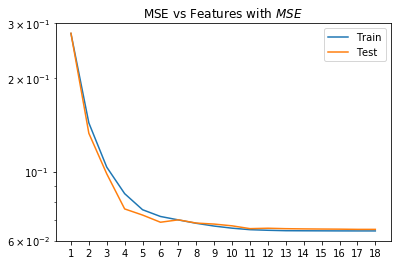

In [30]:
X = df_scaled_train.as_matrix()
y = ytrain.as_matrix()
Xtest = x_test.as_matrix()
indexes = []
train_mses = []
test_mses = []
for reg in regressors:
    indexes.append(reg)
    Xtmp = X[:,indexes]
    linreg = lm.LinearRegression(fit_intercept=False)
    yhat = linreg.fit(Xtmp,ytrain).predict(Xtmp)
    train_mse = metrics.mean_squared_error(y,yhat)
    
    XtestTmp = Xtest[:,indexes]
    yhat_test = linreg.predict(Xtest[:,indexes])
    test_mse = metrics.mean_squared_error(yhat_test,ytest)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
#plot de errores
x_ax = list(range(1, len(regressors)+1))
plt.title("MSE vs Features with $MSE$")
plt.semilogy(x_ax,train_mses,label="Train")
plt.semilogy(x_ax,test_mses, label="Test")
plt.xticks(x_ax)
plt.legend()
plt.show()

In [31]:
regressors_r2 = fss(Xm,Ym,names_regressors, metric="r2")
regressors_r2

selected = grade ...
totalvars=2, mse = -0.483659
selected = lat-long ...
totalvars=3, mse = -0.627540
selected = sqft_living ...
totalvars=4, mse = -0.693786
selected = yr_built ...
totalvars=5, mse = -0.728073
selected = view ...
totalvars=6, mse = -0.741283
selected = sqft_lot15 ...
totalvars=7, mse = -0.747780
selected = bathrooms ...
totalvars=8, mse = -0.754010
selected = condition ...
totalvars=9, mse = -0.759007
selected = waterfront ...
totalvars=10, mse = -0.762713
selected = floors ...
totalvars=11, mse = -0.765340
selected = sqft_lot ...
totalvars=12, mse = -0.766374
selected = yr_renovated ...
totalvars=13, mse = -0.767098
selected = bedrooms ...
totalvars=14, mse = -0.767228
selected = sqft_basement ...
totalvars=15, mse = -0.767333
selected = intercept ...
totalvars=16, mse = -0.767431
selected = sqft_living15 ...
totalvars=17, mse = -0.767469
selected = sqft_above ...
totalvars=18, mse = -0.767469


[17, 8, 13, 2, 11, 6, 15, 1, 7, 5, 4, 3, 12, 0, 10, 16, 14, 9]

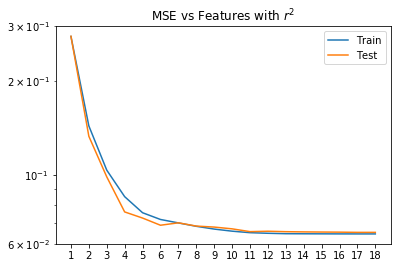

In [32]:
X = df_scaled_train.as_matrix()
y = ytrain.as_matrix()
Xtest = x_test.as_matrix()
indexes = []
train_mses = []
test_mses = []
for reg in regressors_r2:
    indexes.append(reg)
    Xtmp = X[:,indexes]
    linreg = lm.LinearRegression(fit_intercept=False)
    yhat = linreg.fit(Xtmp,ytrain).predict(Xtmp)
    train_mse = metrics.mean_squared_error(y,yhat)
    
    XtestTmp = Xtest[:,indexes]
    yhat_test = linreg.predict(Xtest[:,indexes])
    test_mse = metrics.mean_squared_error(yhat_test,ytest)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
#plot de errores
x_ax = list(range(1, len(regressors)+1))
plt.title("MSE vs Features with $r^2$")
plt.semilogy(x_ax,train_mses,label="Train")
plt.semilogy(x_ax,test_mses, label="Test")
plt.xticks(x_ax)
plt.legend()
plt.show()

La lista de regressores seleccionados son iguales por lo que los gráficos son iguales (en ambos mostramos el MSE)

In [33]:
np.allclose(regressors,regressors_r2)

True

<div id='3' />
###  3. Regularización

<div id='3a' />
##### (a) Ajuste un modelo lineal utilizando “Ridge Regression”, es decir, regularizando con la norma $l_2$. Utilice valores del parámetro de regularización $\lambda$ en el rango $[10^4, 10^{−1}]$. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. (Hint: Note que la lınea 4 y el primer argumento en la lınea 12 son crıticos).

Se observa como Ridge ajusta los pesos de las variables debido a la penalización. Es posible notar como Ridge, al utilizar norma cuadrada, no ajusta los pesos a 0. Finalmente, a medida que se reduce el valor de $\lambda$, la variación de los pesos es mínima.

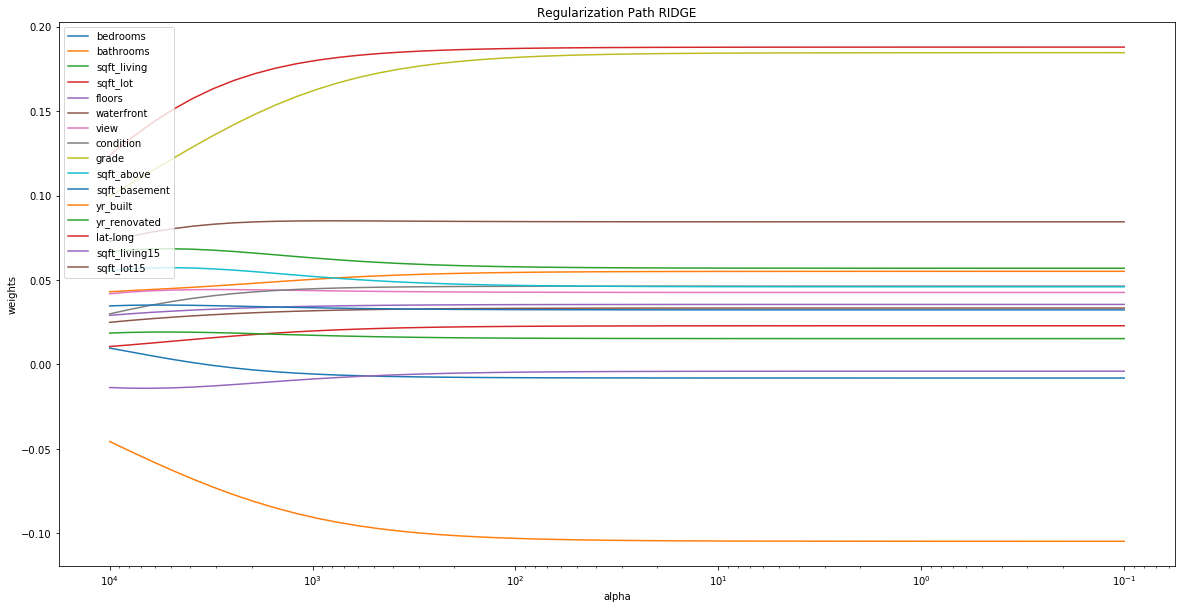

In [34]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
Dtrain = df_scaled_train.copy()
Dtrain = Dtrain.drop('intercept', axis=1)
names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15"]
alphas_ = np.logspace(6,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    coefs.append(model.coef_)

fig = plt.figure(figsize=(20,10))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
#     print(alphas_.shape)
#     print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

<div id='3b' />
#####  (b) Ajuste un modelo lineal utilizando el método “Lasso”, es decir, regularizando con la norma $l_1$. Utilice valores del parámetro de regularización $\lambda$ en el rango $[10^1, 10^{−2}]$.  Para obtener el código, modifique las líneas 7 y 9 del ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo Lasso para seleccionar atributos?

Al contrario de Ridge, Lasso intenta mantener los pesos en cero "lo más que pueda", realizando adicionalmente la tarea de Feature Selection, la cual no puede ser realizada por Ridge.

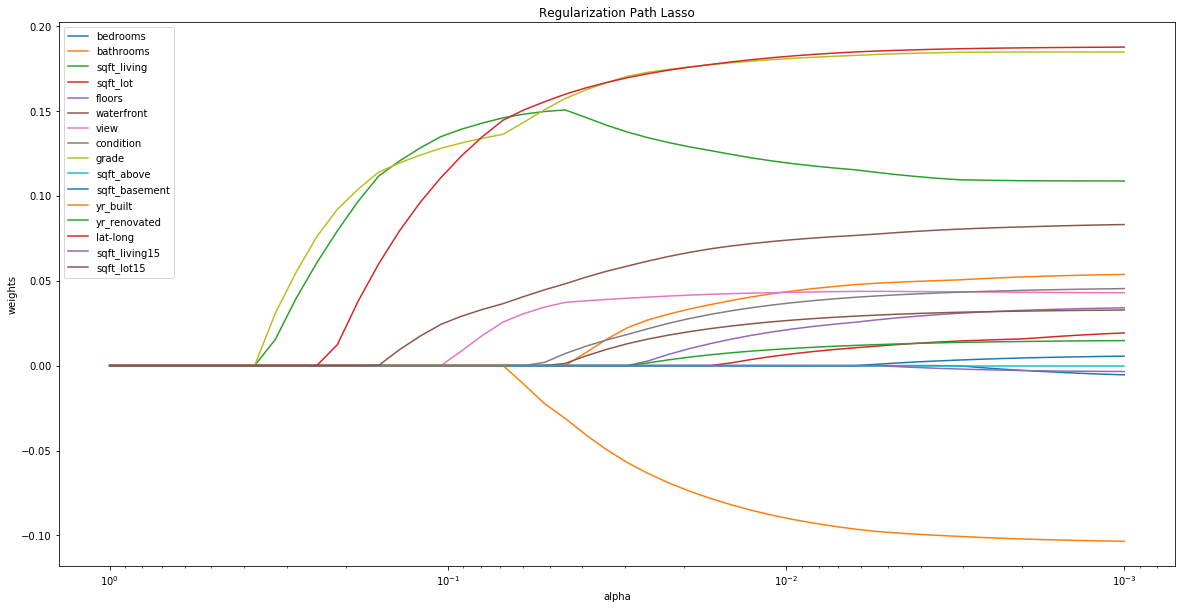

In [35]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
Dtrain = df_scaled_train.copy()
Dtrain = Dtrain.drop('intercept', axis=1)
names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15"]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    coefs.append(model.coef_)

fig = plt.figure(figsize=(20,10))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
#     print(alphas_.shape)
#     print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path Lasso')
plt.axis('tight')
plt.legend(loc=2)
plt.show()


<div id='3c' />
##### (c) Utilizando “Ridge Regression”, construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del parámetro de regularización. Discuta lo que observa.

El error converge muy rápidamente con el uso de Ridge. Aunque es posible observar un poco de overfitting para parámetros más pequeños.

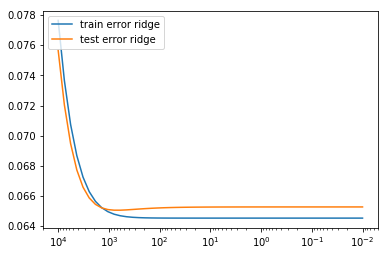

In [36]:
Xtest = x_test.copy()
ytest = ytest.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(4,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

<div id='3d' />
##### (d) Utilizando “Lasso”, construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del parámetro de regularización. Discuta lo que observa.

El error inicial es muy alto y se mantiene constante con los primeros valores de $\lambda$, para luego converger rápidamente (no tanto como con Ridge). Es posible obvervar que no existe overfitting en este caso.

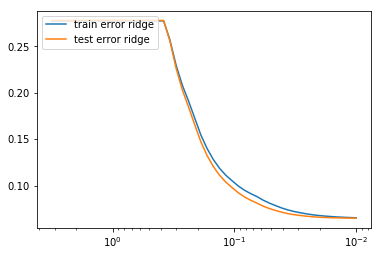

In [37]:
Xtest = x_test.copy()
ytest = ytest.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(0.5,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, ytrain)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

<div id='3e' />
##### (e) Estime el valor del parámetro de regularización en los métodos anteriores usando validación cruzada.

En ambos casos el parámetro encontrado es de $\lambda = 0.01$, el menor de los probados.

In [38]:
from sklearn.linear_model import Ridge
MSE = lambda y,yhat: np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn import cross_validation
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
alphas_ = np.logspace(4,-2,base=10)
model = Ridge(fit_intercept=True)
mse_list_k10 = []
for a in alphas_:
    model.set_params(alpha=a)
    for train,vald in k_fold:
        cross_scaler = StandardScaler().fit(Xm[train])
        df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]),
        columns=Xtrain.columns)
        df_cross_train.insert(df_cross_train.shape[1], 'intercept',
        np.ones(df_cross_train.shape[0]))
        df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[vald]),
        columns=Xtrain.columns)
        df_cross_test.insert(df_cross_test.shape[1], 'intercept',
        np.ones(df_cross_test.shape[0]))
        mse_list_k10.append(MSE(model.fit(df_cross_train,
        ym[train]).predict(df_cross_test),ym[vald]))
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
print("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

/home/tronco/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


BEST PARAMETER=0.010000, MSE(CV)=0.065595


In [39]:
from sklearn.linear_model import Lasso
MSE = lambda y,yhat: np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn import cross_validation
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
alphas_ = np.logspace(0.5,-2,base=10)
model = Lasso(fit_intercept=True)
mse_list_k10 = []
for a in alphas_:
    model.set_params(alpha=a)
    for train,vald in k_fold:
        cross_scaler = StandardScaler().fit(Xm[train])
        df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]),
        columns=Xtrain.columns)
        df_cross_train.insert(df_cross_train.shape[1], 'intercept',
        np.ones(df_cross_train.shape[0]))
        df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[vald]),
        columns=Xtrain.columns)
        df_cross_test.insert(df_cross_test.shape[1], 'intercept',
        np.ones(df_cross_test.shape[0]))
        mse_list_k10.append(MSE(model.fit(df_cross_train,
        ym[train]).predict(df_cross_test),ym[vald]))
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
print("BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse))

BEST PARAMETER=0.010000, MSE(CV)=0.172197


<div id='4' />
### 4. Predicción de Utilidades de Pelı́culas

<div id='4a' />
##### (a) Lea los archivos de datos y cárguelos en dos dataframe o matrices X, y. En el caso de X es extremadamente importante que mantenga el formato disperso (sparse) (¿por qué?). Si trabaja con matrices use matrices dispersas del tipo csr_matrix o csc_matrix. Si prefiere operar sobre un dataframe, puede utilizar los (recientemente introducidos) dataframe dispersos de pandas: SparseDataFrame, aunque todavía no se tiene una operabilidad completa.

En un conjunto de datos con tan alta dimensionalidad es importante mantener el formato disperso, pues éste genera optimizaciones computacionales a la hora de operar con los datos.

In [40]:
# !wget http://www.inf.utfsm.cl/~cvalle/movies.tar.gz;tar -xzvf movies.tar.gz;rm movies.tar.gz

In [41]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix,vstack
from scipy.io import mmread
set_path = "movies-preproc/ngrams-deprels-fp1-origin.runtime.budget.numscreen.ratings.seasons.stars/"
X_test = csr_matrix(mmread(set_path+'test.x.mm'))
y_test = np.loadtxt(set_path+'test.y.dat')

X_train = csr_matrix(mmread(set_path+'train.x.mm'))
y_train = np.loadtxt(set_path+'train.y.dat')

X_val = csr_matrix(mmread(set_path+'dev.x.mm'))
y_val = np.loadtxt(set_path+'dev.y.dat')

<div id='4b' />
##### (b) Construya un modelo lineal que obtenga un coeficiente de determinación (sobre el conjunto de pruebas) de al menos 0.75. A partir de un modelo lineal de sklearn, el coeficiente de determinación se obtiene fácilmente.

Se probaron varios modelos, como regresión lineal, Ridge y Lasso, junto con el preprocesamiento de los datos mediante SVD truncada (debido a la sparcidad). Finalmente, se llegó a la conclusión de que los datos a ser predecidos no eran lineales, comprobando una forma exponencial al analizarlos. Al aplicar logaritmo a la característica objetivo se logró la linealidad deseada y mediante TruncatedSVD y la normalización de los datos, Ridge alcanzo un coeficiente de determinación de 0.837401.

In [42]:
import sklearn.linear_model as lm
model = lm.LinearRegression(fit_intercept = False)
model.fit(vstack((X_train,X_val)),np.hstack((y_train,y_val)))
print("train: R^2=%f"%model.score(X_test, y_test))

train: R^2=0.594850


In [43]:
alphas_ = np.logspace(4,-1,base=10, num=10)
model = lm.Ridge()
scores = np.empty_like(alphas_)
test_scores =  np.empty_like(alphas_)
for i,alpha in enumerate(alphas_):
    model.set_params(alpha=alpha)
    model.fit(X_train,y_train)
    scores[i] = model.score(X_val,y_val)
    test_scores[i] = model.score(X_test,y_test)
pd.DataFrame({"alpha":alphas_,"scores":scores, "test_score": test_scores})

KeyboardInterrupt: 

In [44]:
import sklearn.decomposition as decomp
import sklearn.preprocessing as preproc

In [45]:
svd = decomp.TruncatedSVD(n_components=200)

In [46]:
stder = preproc.StandardScaler()

In [47]:
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)
X_val_svd = svd.transform(X_val)

In [48]:
X_train_preproc = stder.fit_transform(X_train_svd)
X_test_preproc = stder.transform(X_test_svd)
X_val_preproc = stder.transform(X_val_svd)

In [49]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_val_log = np.log(y_val)

In [50]:
linreg = lm.LinearRegression()
linreg.fit(X_train_preproc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
y_approx = linreg.predict(X_test_preproc)

In [52]:
metrics.r2_score(y_test,y_approx)

0.58377216998507664

In [53]:
alphas_ = np.logspace(4,-10,base=10, num=50)
model = lm.Ridge()
scores = np.empty_like(alphas_)
test_scores =  np.empty_like(alphas_)
for i,alpha in enumerate(alphas_):
    model.set_params(alpha=alpha)
    model.fit(X_train_preproc,y_train_log)
    scores[i] = model.score(X_val_preproc,y_val_log)
    test_scores[i] = model.score(X_test_preproc,y_test_log)
results = pd.DataFrame({"alpha":alphas_,"scores":scores, "test_scores": test_scores})
results

,alpha,scores,test_scores
0,1.000000e+04,0.202883,0.206874
1,5.179475e+03,0.344391,0.357942
2,2.682696e+03,0.506323,0.529182
3,1.389495e+03,0.646907,0.674730
4,7.196857e+02,0.736370,0.763006
5,3.727594e+02,0.780397,0.801976
6,1.930698e+02,0.802138,0.817984
7,1.000000e+02,0.817460,0.828253
8,5.179475e+01,0.830049,0.836400
9,2.682696e+01,0.838540,0.840951


In [57]:
best_alpha = results.alpha.iloc[results.test_scores.argmin()]

In [58]:
model.set_params(alpha=best_alpha)
model.fit(X_test_preproc,y_train_log)
r2 = model.score(X_test_preproc,y_test_log)

KeyboardInterrupt: 

In [ ]:
r2